In [1]:
!pip install tensorflow
!pip install opencv-python

In [1]:
import cv2
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics

%matplotlib inline

In [2]:
datagen= keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.25, #Split 75% for train and 25% for validation/test
    rescale=1./255 #Rescale the images
)

In [3]:
train_ds = datagen.flow_from_directory(
    "D:\dataset",
    target_size=(128, 128), #Target size
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = datagen.flow_from_directory(
    "D:\dataset", # same directory as training data
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 5151 images belonging to 11 classes.
Found 1711 images belonging to 11 classes.


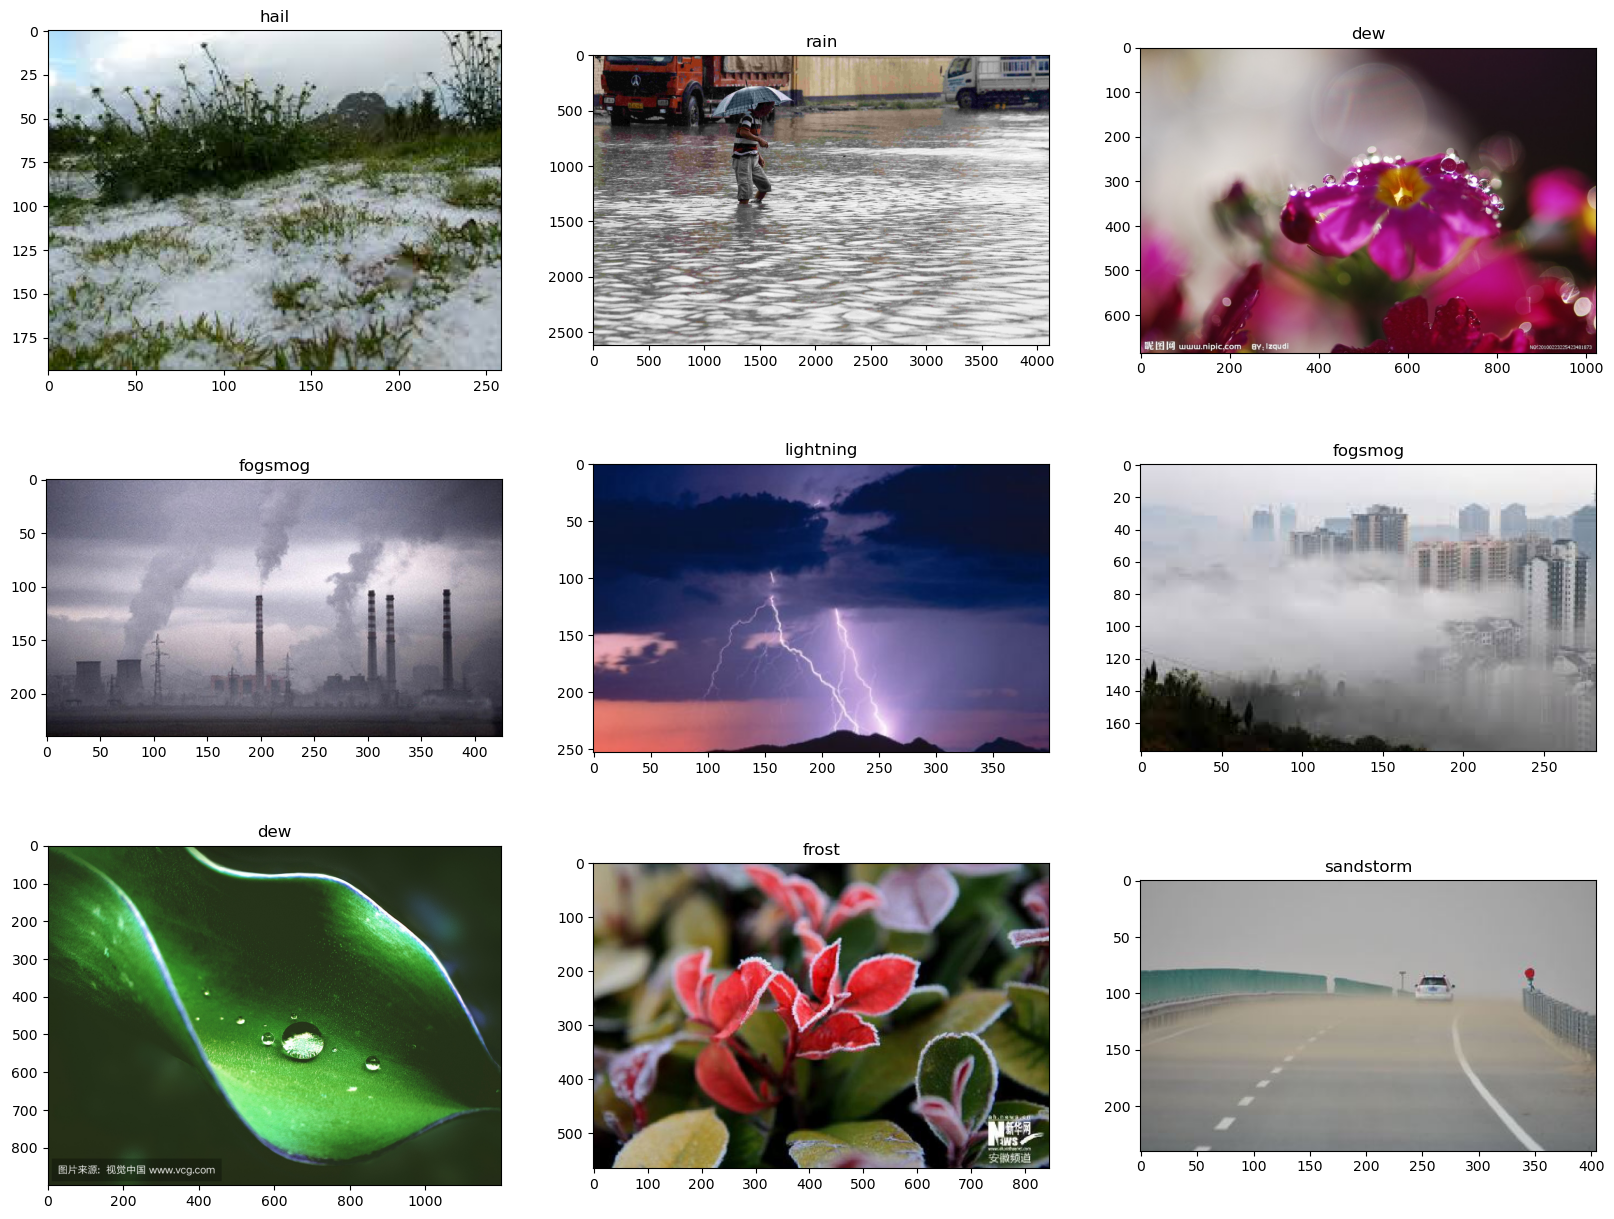

In [7]:
import random

fig, axes = plt.subplots(3,3, figsize=(20, 15))

indices_classes = {v: k for k, v in train_ds.class_indices.items()}
images_classes = list(zip(train_ds.filepaths, [indices_classes[k] for k in train_ds.classes]))
for ax in  axes.reshape(-1):
    random_image = random.choice(images_classes)
    img = mpimg.imread(random_image[0])
    ax.set_title(random_image[1])
    ax.imshow(img)

In [8]:
# Function to print the results of the fit process
def print_loss(result):
    plt.figure(figsize=(15,10))
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

In [9]:
# Dictionary to store all the evalute values from each neural network we test
predictions = {}

In [10]:
IMG_SHAPE = (128,128, 3)

base_model = keras.applications.ResNet50V2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

In [11]:
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ ?                           │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [12]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=50,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

predictions['ResNet'] = model.evaluate(val_ds)

Epoch 1/50


C:\Users\srira\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.6334 - loss: 1.1933 - val_accuracy: 0.7954 - val_loss: 0.6092
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 119s 736ms/step - accuracy: 0.8703 - loss: 0.3658 - val_accuracy: 0.8136 - val_loss: 0.5879
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 124s 763ms/step - accuracy: 0.9234 - loss: 0.2239 - val_accuracy: 0.8136 - val_loss: 0.6007
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 127s 785ms/step - accuracy: 0.9615 - loss: 0.1302 - val_accuracy: 0.8159 - val_loss: 0.6138
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 131s 807ms/step - accuracy: 0.9774 - loss: 0.0922 - val_accuracy: 0.8241 - val_loss: 0.6532
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 134s 826ms/step - accuracy: 0.9929 - loss: 0.0512 - val_accuracy: 0.8165 - val_loss: 0.7002
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 137s 840ms/step - accuracy: 0.9891 - loss: 0.0481 - val_accuracy: 0.8048 - val_loss: 0.8116
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 602ms/step - accuracy: 0.7986 - loss: 0.8489


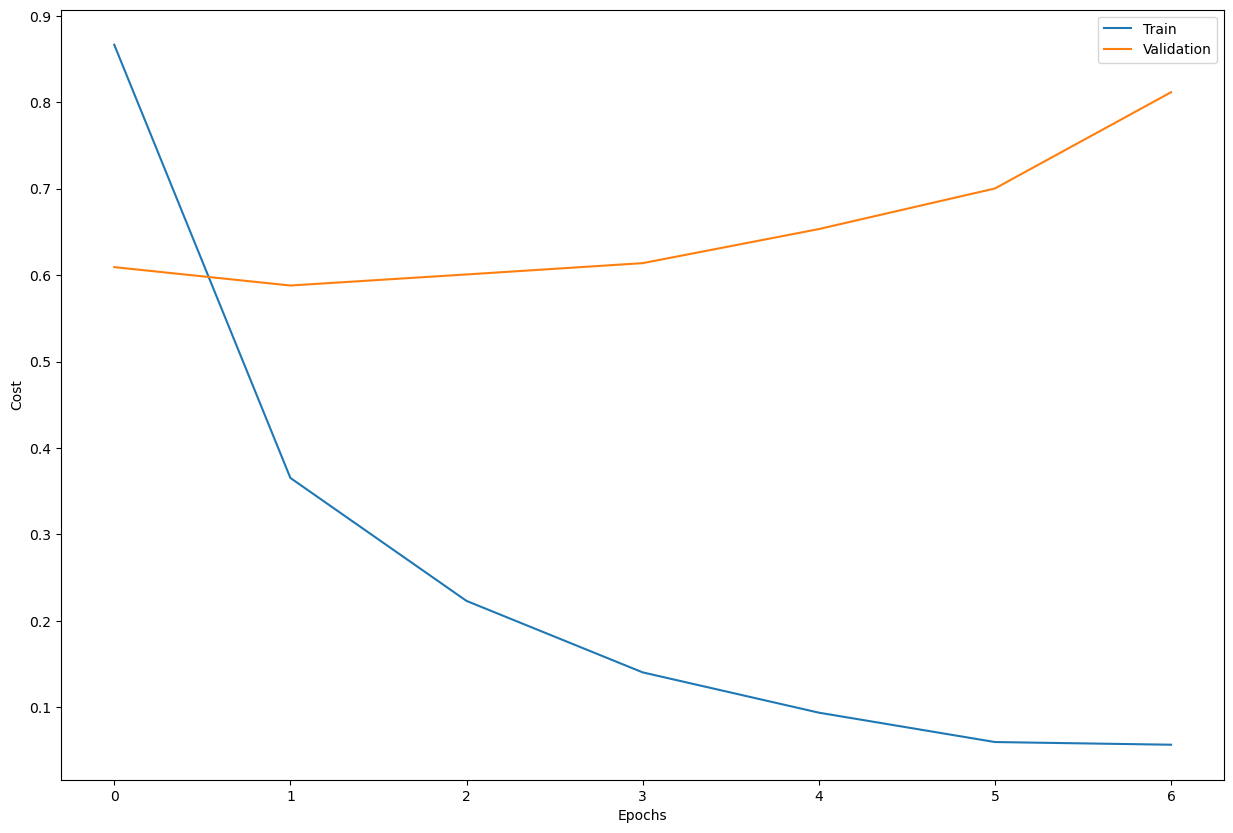

In [13]:
print_loss(history)

In [14]:
mobilenet=keras.applications.MobileNet(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

model = Sequential([
    mobilenet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional)      │ ?                           │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [15]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=50,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

predictions['MobileNet'] = model.evaluate(val_ds)

Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 161s 842ms/step - accuracy: 0.6964 - loss: 1.0278 - val_accuracy: 0.7440 - val_loss: 0.7826
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 143s 883ms/step - accuracy: 0.8658 - loss: 0.4333 - val_accuracy: 0.7662 - val_loss: 0.7614
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 152s 941ms/step - accuracy: 0.8850 - loss: 0.3638 - val_accuracy: 0.7861 - val_loss: 0.9150
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 137s 844ms/step - accuracy: 0.9151 - loss: 0.2725 - val_accuracy: 0.8422 - val_loss: 0.5606
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 134s 825ms/step - accuracy: 0.9184 - loss: 0.2519 - val_accuracy: 0.7691 - val_loss: 0.7991
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 129s 795ms/step - accuracy: 0.9286 - loss: 0.2121 - val_accuracy: 0.8083 - val_loss: 0.6594
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.8120 - loss: 0.6284


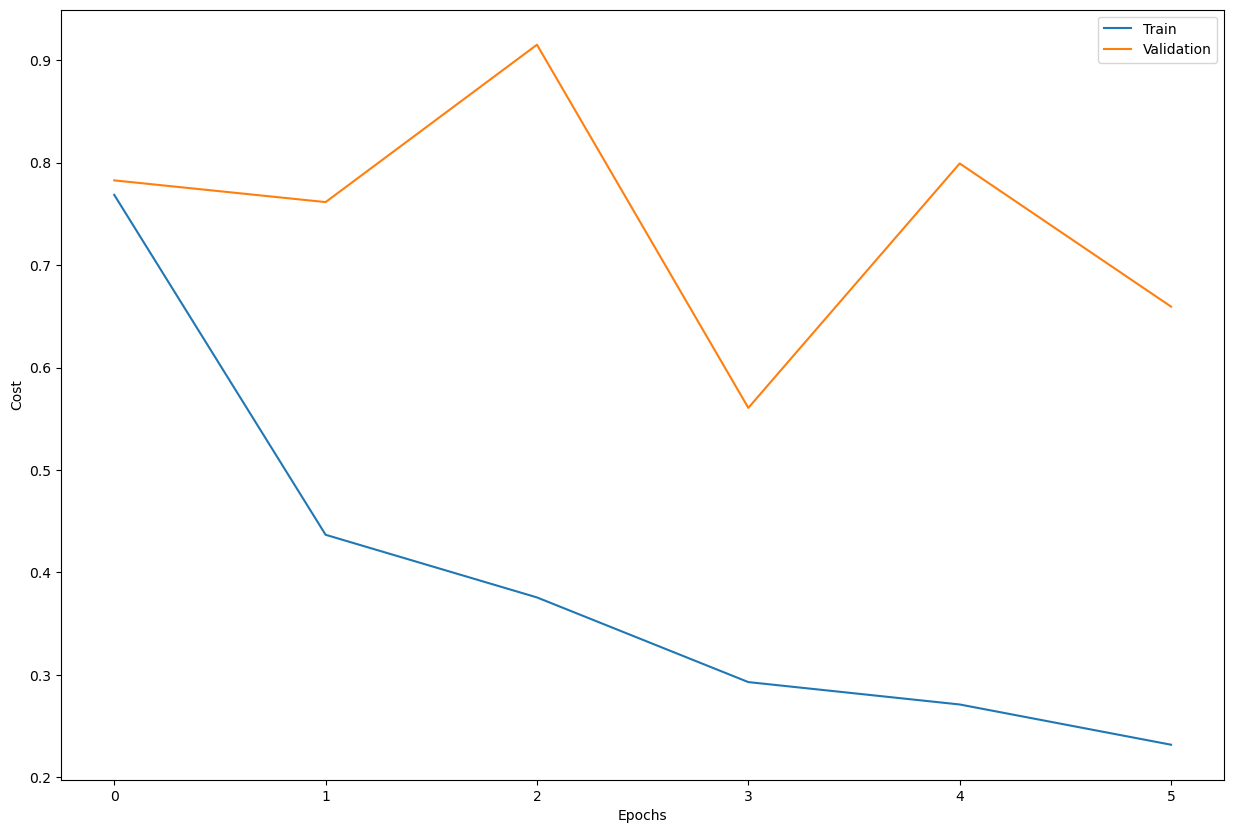

In [16]:
print_loss(history)

In [17]:
# Build the LeNET architecture
model = Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=IMG_SHAPE))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))  # Add pool_size argument
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))  # Add pool_size argument
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=11, activation='softmax'))  # Use softmax for multi-class classification

model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

C:\Users\srira\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 63, 63, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 16)          │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 30, 30, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 120)                 │       1,728,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,740,267 (6.64 MB)

 Trainable params: 1,740,267 (6.64 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=50,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

predictions['LeNET'] = model.evaluate(val_ds)

Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 232ms/step - accuracy: 0.3405 - loss: 1.9144 - val_accuracy: 0.5967 - val_loss: 1.2496
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 35s 211ms/step - accuracy: 0.5914 - loss: 1.2241 - val_accuracy: 0.6067 - val_loss: 1.2470
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.6679 - loss: 1.0172 - val_accuracy: 0.6996 - val_loss: 0.9888
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - accuracy: 0.7236 - loss: 0.8541 - val_accuracy: 0.6511 - val_loss: 1.0799
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 220ms/step - accuracy: 0.7686 - loss: 0.7092 - val_accuracy: 0.6575 - val_loss: 1.0944
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.6417 - loss: 1.1193


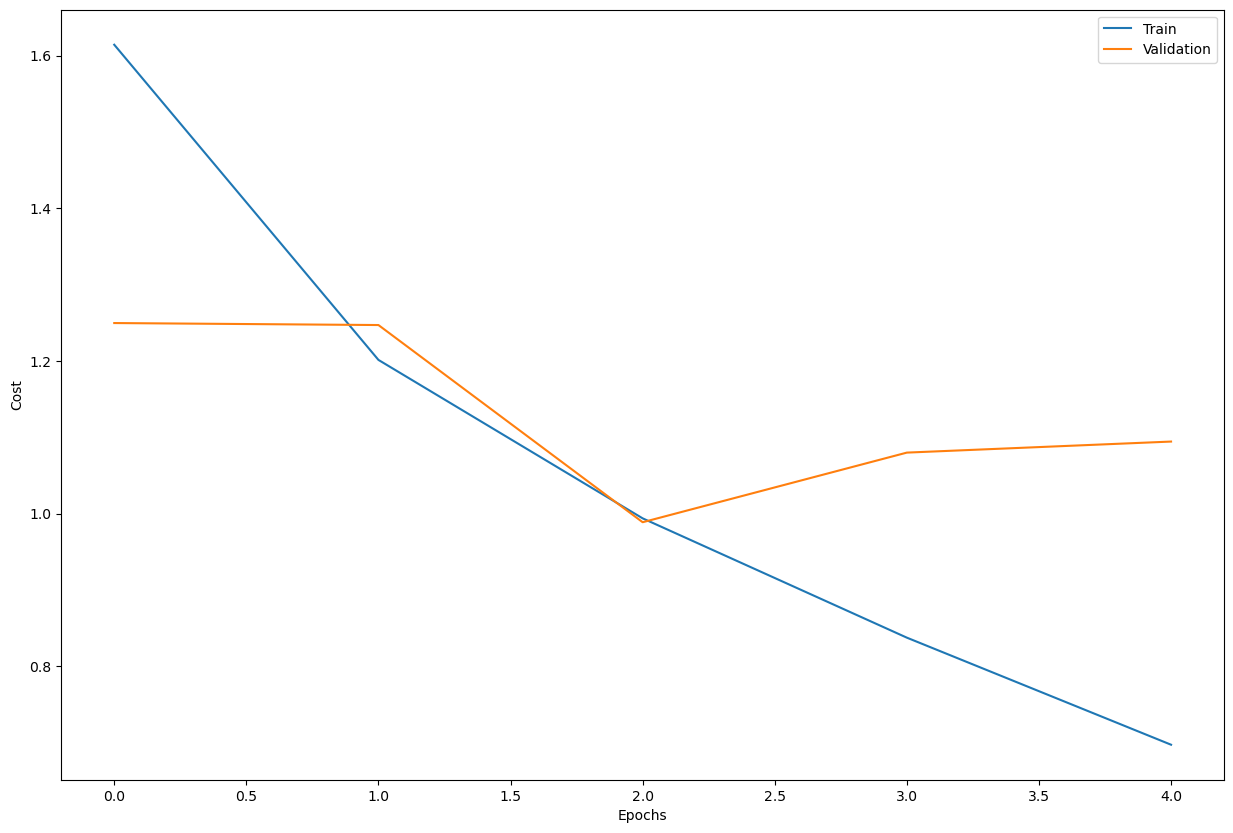

In [19]:
print_loss(history)

In [20]:
for prediction in predictions.items():
    print(f"""{prediction[0]}: {round((prediction[1][1] * 100),2)}%""")

ResNet: 80.48%
MobileNet: 80.83%
LeNET: 65.75%
